In [13]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directory containing the JSON files
results_dir = './results'


def plot(results_dir, experiment_type = None, graphs=False, confusion_matrix=False):
    data_list = []

    # Loop through each file in the directory
    for filename in os.listdir(results_dir):
        if filename.endswith('.json'):
            if experiment_type != None:
                if experiment_type not in filename:
                    continue
            # Load the data from the JSON file
            with open(os.path.join(results_dir, filename), 'r') as file:
                data = json.load(file)

            model_id = data['model_id']
            train_acc_list = data.get('train_accuracy', None)
            train_loss_list = data.get('train_loss', None)
            val_acc_list = data.get('val_accuracy', None)
            val_loss_list = data.get('val_loss', None)
            best_val_acc = data['results'].get('best_acc', None)
            best_epoch = data['results'].get('best_acc_epoch', None)
            cm = np.array(data['results'].get('confusion_matrix', [])) if 'confusion_matrix' in data['results'] else None

            # Extract hyperparameters if available, otherwise set as None
            lr = data['hyperparameters'].get('learning_rate', None)
            epochs = data['hyperparameters'].get('num_epochs', None)
            batch_size = data['hyperparameters'].get('batch_size', None)
            max_len = data['hyperparameters'].get('max_len', None)
            

            row_data = {
                'model_id': model_id,
                'learning_rate': lr,
                'num_epochs': epochs,
                'batch_size': batch_size,
                'max_len': max_len,
                'best_epoch':best_epoch,
                'best_val_accuracy': best_val_acc,
            }

            data_list.append(row_data)
            if confusion_matrix:
                # Plot the confusion matrix
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.title(f'Confusion Matrix for Model {model_id}')
                plt.show()

                # Print the classification report
                report = data['results']['classification_report']
                print(f'Classification Report for Model {model_id}:')
                print(report)

            if graphs:            
                fig, ax = plt.subplots()
                ax.plot(train_acc_list, label='Training Accuracy')
                ax.plot(val_acc_list, label='Validation Accuracy')
                ax.set_xlabel('Epoch')
                ax.set_ylabel('Accuracy')
                ax.set_title(f'Accuracy for lr {lr}, batch size {batch_size}, max len {max_len}, best ac: {best_val_acc:.2f}')
                ax.legend()
                ax.set_ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy

                # Add faint grid
                ax.set_axisbelow(True)
                ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
                # Display best accuracy in a box on the graph
                best_acc_text = f'Best Accuracy: {best_val_acc:.2f}'
                plt.text(0.05, 0.95, best_acc_text, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

                # Plot the training and validation loss
                plt.figure()
                plt.plot(train_loss_list, label='Training Loss')
                plt.plot(val_loss_list, label='Validation Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title(f'Loss for Model {model_id}')
                plt.legend()
                plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)  # Add faint grid
                plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for accuracy
                plt.tight_layout()
                plt.show()
                
    df = pd.DataFrame(data_list)
    df.set_index('model_id', inplace=True)
    
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: yellow' if v else '' for v in is_max]

    styled_df = df.style.apply(highlight_max, subset=['best_val_accuracy'])
    return styled_df


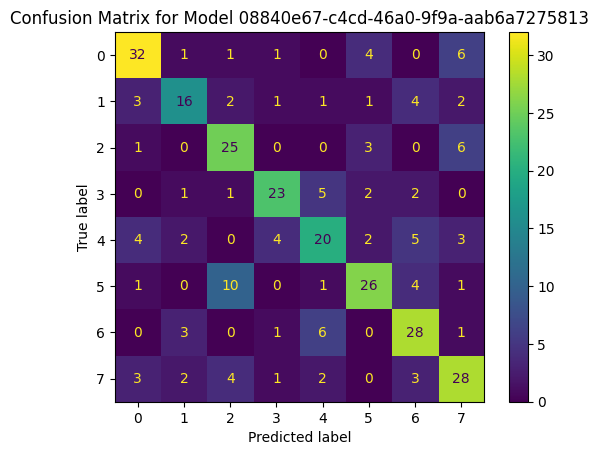

Classification Report for Model 08840e67-c4cd-46a0-9f9a-aab6a7275813:
                           precision    recall  f1-score   support

              flag_waving       0.73      0.71      0.72        45
exaggeration,minimisation       0.64      0.53      0.58        30
causal_oversimplification       0.58      0.71      0.64        35
    name_calling,labeling       0.74      0.68      0.71        34
               repetition       0.57      0.50      0.53        40
                    doubt       0.68      0.60      0.64        43
          loaded_language       0.61      0.72      0.66        39
 appeal_to_fear_prejudice       0.60      0.65      0.62        43

                 accuracy                           0.64       309
                macro avg       0.64      0.64      0.64       309
             weighted avg       0.64      0.64      0.64       309



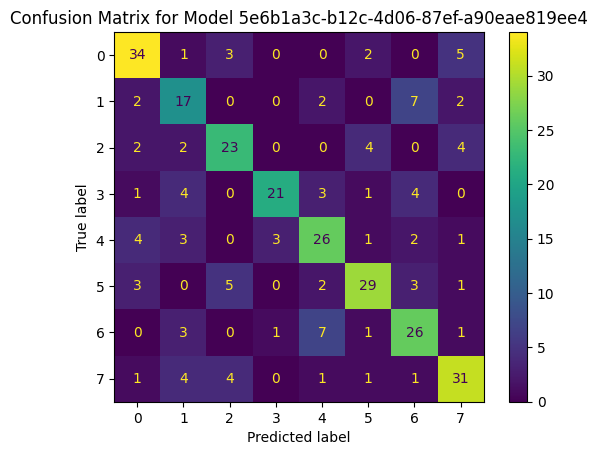

Classification Report for Model 5e6b1a3c-b12c-4d06-87ef-a90eae819ee4:
                           precision    recall  f1-score   support

              flag_waving       0.72      0.76      0.74        45
exaggeration,minimisation       0.50      0.57      0.53        30
causal_oversimplification       0.66      0.66      0.66        35
    name_calling,labeling       0.84      0.62      0.71        34
               repetition       0.63      0.65      0.64        40
                    doubt       0.74      0.67      0.71        43
          loaded_language       0.60      0.67      0.63        39
 appeal_to_fear_prejudice       0.69      0.72      0.70        43

                 accuracy                           0.67       309
                macro avg       0.67      0.66      0.67       309
             weighted avg       0.68      0.67      0.67       309



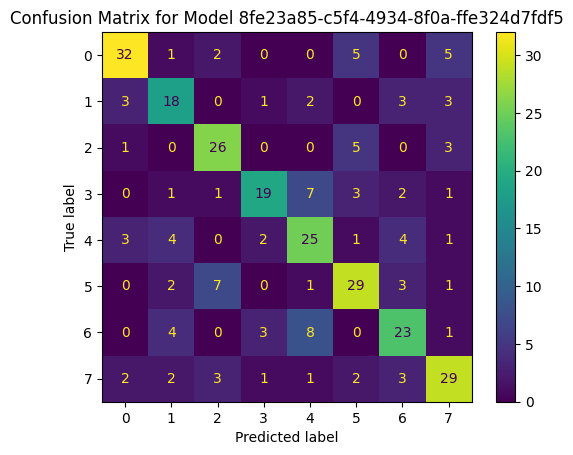

Classification Report for Model 8fe23a85-c5f4-4934-8f0a-ffe324d7fdf5:
                           precision    recall  f1-score   support

              flag_waving       0.78      0.71      0.74        45
exaggeration,minimisation       0.56      0.60      0.58        30
causal_oversimplification       0.67      0.74      0.70        35
    name_calling,labeling       0.73      0.56      0.63        34
               repetition       0.57      0.62      0.60        40
                    doubt       0.64      0.67      0.66        43
          loaded_language       0.61      0.59      0.60        39
 appeal_to_fear_prejudice       0.66      0.67      0.67        43

                 accuracy                           0.65       309
                macro avg       0.65      0.65      0.65       309
             weighted avg       0.66      0.65      0.65       309



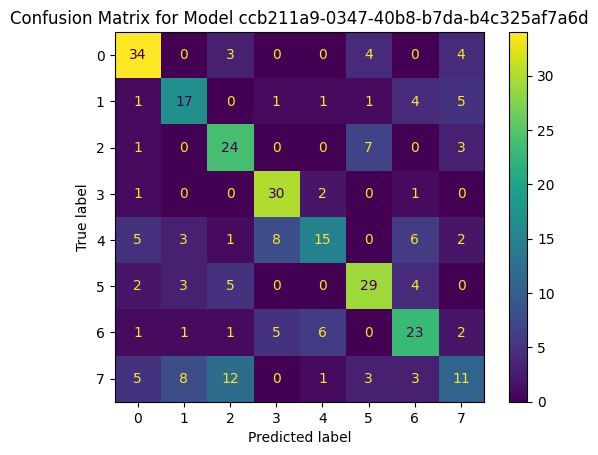

Classification Report for Model ccb211a9-0347-40b8-b7da-b4c325af7a6d:
                           precision    recall  f1-score   support

              flag_waving       0.68      0.76      0.72        45
exaggeration,minimisation       0.53      0.57      0.55        30
causal_oversimplification       0.52      0.69      0.59        35
    name_calling,labeling       0.68      0.88      0.77        34
               repetition       0.60      0.38      0.46        40
                    doubt       0.66      0.67      0.67        43
          loaded_language       0.56      0.59      0.57        39
 appeal_to_fear_prejudice       0.41      0.26      0.31        43

                 accuracy                           0.59       309
                macro avg       0.58      0.60      0.58       309
             weighted avg       0.58      0.59      0.58       309



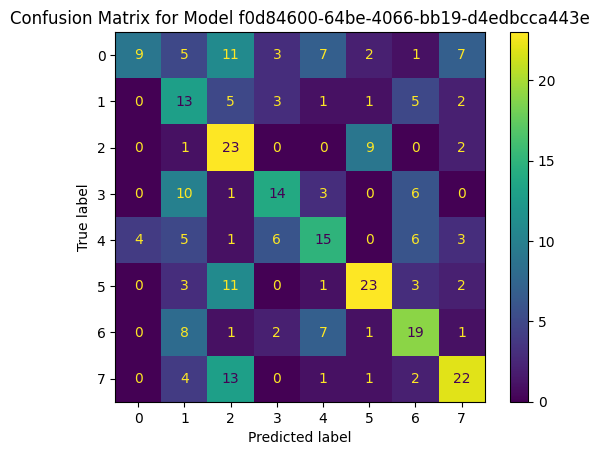

Classification Report for Model f0d84600-64be-4066-bb19-d4edbcca443e:
                           precision    recall  f1-score   support

              flag_waving       0.69      0.20      0.31        45
exaggeration,minimisation       0.27      0.43      0.33        30
causal_oversimplification       0.35      0.66      0.46        35
    name_calling,labeling       0.50      0.41      0.45        34
               repetition       0.43      0.38      0.40        40
                    doubt       0.62      0.53      0.57        43
          loaded_language       0.45      0.49      0.47        39
 appeal_to_fear_prejudice       0.56      0.51      0.54        43

                 accuracy                           0.45       309
                macro avg       0.48      0.45      0.44       309
             weighted avg       0.50      0.45      0.44       309



In [17]:
boop = plot(results_dir, experiment_type = 'multi', graphs=False, confusion_matrix=True)

In [18]:
boop

,learning_rate,num_epochs,batch_size,max_len,best_epoch,best_val_accuracy
model_id,,,,,,
08840e67-c4cd-46a0-9f9a-aab6a7275813,0.000005,35,25,150,28,0.640777
5e6b1a3c-b12c-4d06-87ef-a90eae819ee4,0.000010,35,25,150,34,0.669903
8fe23a85-c5f4-4934-8f0a-ffe324d7fdf5,0.000050,35,25,150,32,0.650485
ccb211a9-0347-40b8-b7da-b4c325af7a6d,0.000001,60,25,150,54,0.592233
f0d84600-64be-4066-bb19-d4edbcca443e,0.000001,35,25,150,34,0.446602
